In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import boundary_conditions
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 1e-3
ion_diameter_m = 8e-10
solvent_diameter_m = 2.75e-10
x = prf.get_x_axis_nm(xmax_nm=100, n_points=1000)
bc = boundary_conditions.Dirichlet(phi_0=1.0)
xmin = -0.05
xmax = 10

## Gouy-Chapman
Gives insight, but ion concentrations are much too high.

Solved in 7 iterations, number of nodes 340087. 
Maximum relative residual: 3.63e-05 
Maximum boundary residual: 6.39e-14
ODE problem solved and saved under ./solutions/Gouy-Chapman\sol_Gouy-Chapman_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


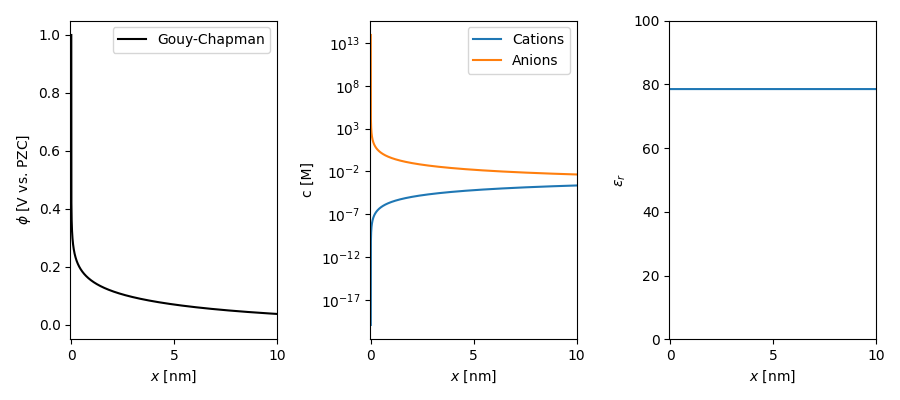

In [3]:
gc = models.GouyChapman(ion_concentration_molar)
gc_sol = gc.solve(x, bc)

fig, ax = plotting.plot_solution(gc_sol, xmin, xmax)
plt.show()

## Borukhov-Andelman-Orland
Ion concentration is limited to its maximum value at the electrode.

Solved in 3 iterations, number of nodes 3207. 
Maximum relative residual: 3.50e-05 
Maximum boundary residual: 1.60e-26
ODE problem solved and saved under ./solutions/Borukhov\sol_Borukhov_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


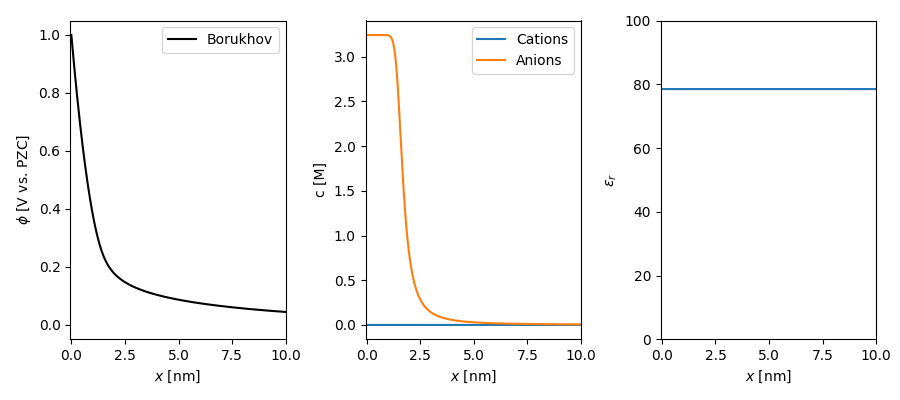

In [4]:
bao = models.Borukhov(ion_concentration_molar, ion_diameter_m)
bao_sol = bao.solve(x, bc)

fig, ax = plotting.plot_solution(bao_sol, xmin, xmax, logscale=False)
plt.show()

## Abrashkin-Andelman-Orland
A Stern layer emerges if the dipole energy is more negative (large dipole moment and large electric field) than the Coulomb energy of ions directly at the electrode.

Solved in 3 iterations, number of nodes 7650. 
Maximum relative residual: 2.68e-05 
Maximum boundary residual: 7.63e-28
ODE problem solved and saved under ./solutions/Abrashkin\sol_Abrashkin_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


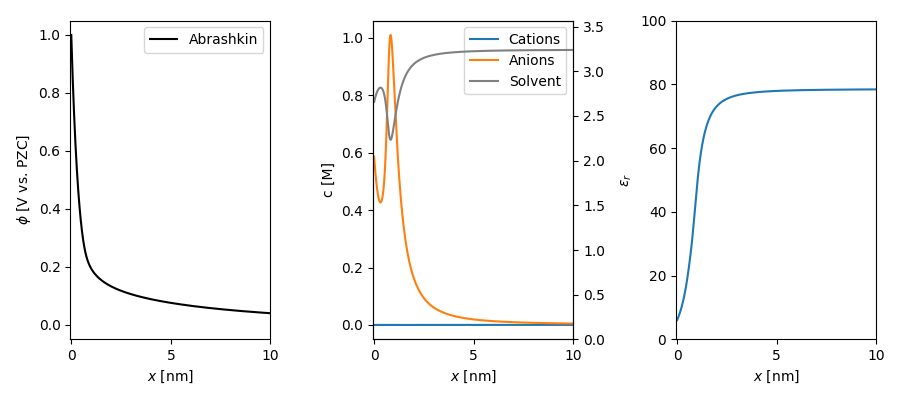

In [5]:
abr = models.Abrashkin(ion_concentration_molar, ion_diameter_m, eps_r_opt=1)
abr_sol = abr.solve(x, bc)

fig, ax = plotting.plot_solution(abr_sol, xmin, xmax, logscale=False)
plt.show()

## Huang-Chen-Eikerling

Solved in 3 iterations, number of nodes 5983. 
Maximum relative residual: 2.27e-05 
Maximum boundary residual: 7.27e-26
ODE problem solved and saved under ./solutions/Huang\sol_Huang_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


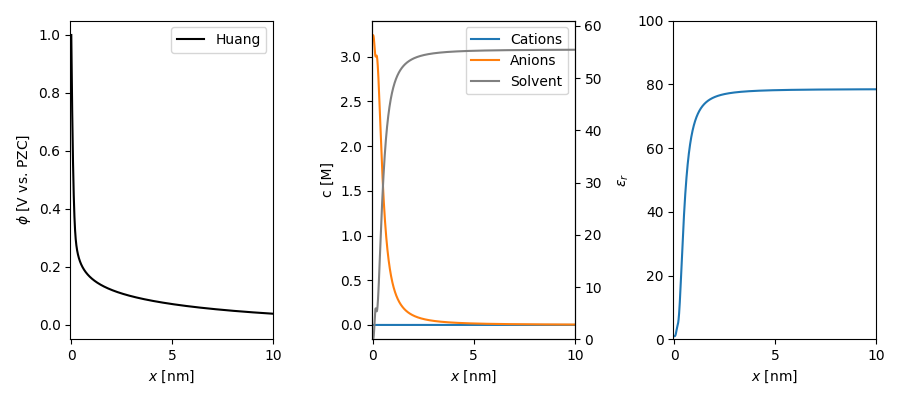

In [6]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, solvent_diameter_m, eps_r_opt=1)
huang_sol = huang.solve(x, bc)

fig, ax = plotting.plot_solution(huang_sol, xmin, xmax, logscale=False)
plt.show()

Should equal Abrashkin for equal ion and solvent molecule sizes, but doesn't... Perhaps an issue with configuration counting (entropy)

Solved in 3 iterations, number of nodes 5984. 
Maximum relative residual: 8.31e-06 
Maximum boundary residual: 2.83e-26
ODE problem solved and saved under ./solutions/Huang\sol_Huang_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


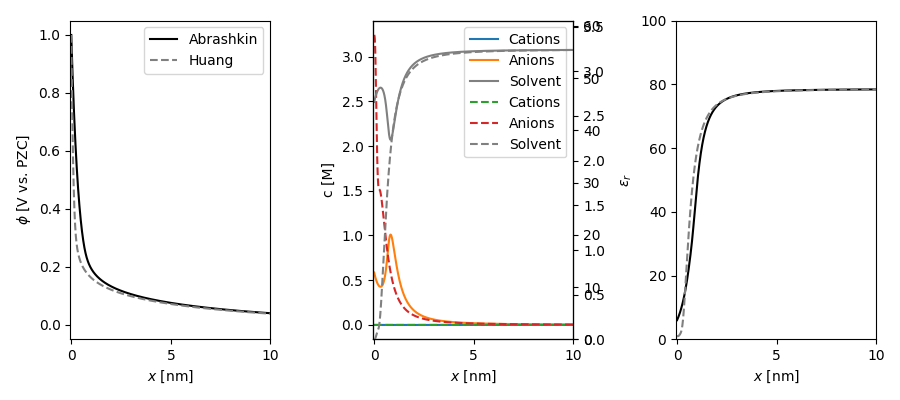

In [7]:
huang = models.Huang(ion_concentration_molar, ion_diameter_m, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
huang_sol2 = huang.solve(x, bc)

fig, ax = plotting.plot_sol_comparison(abr_sol, huang_sol2, xmin, xmax, logscale=False)

## Huang simplified

Solved in 2 iterations, number of nodes 2918. 
Maximum relative residual: 2.79e-04 
Maximum boundary residual: 1.10e-24
ODE problem solved and saved under ./solutions/HuangSimple\sol_HuangSimple_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


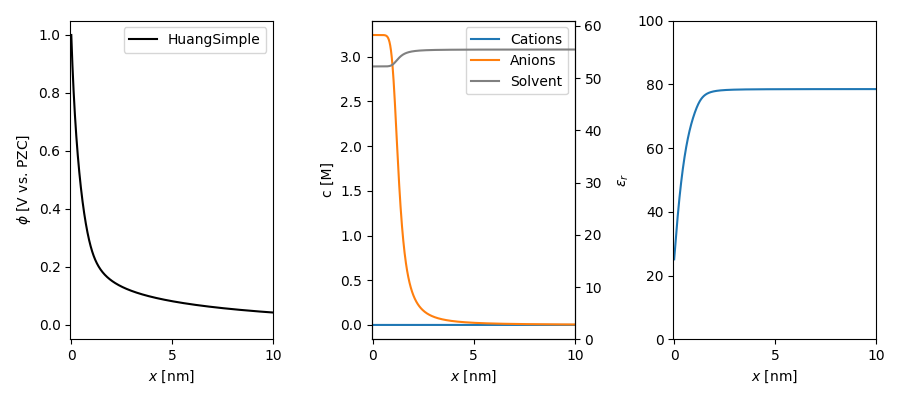

In [8]:
simple = models.HuangSimple(ion_concentration_molar, ion_diameter_m, ion_diameter_m, eps_r_opt=1)
simple_sol = simple.solve(x, bc)

fig, ax = plotting.plot_solution(simple_sol, xmin, xmax, logscale=False)
plt.show()

Solved in 3 iterations, number of nodes 2998. 
Maximum relative residual: 4.24e-04 
Maximum boundary residual: 7.05e-21
ODE problem solved and saved under ./solutions/Multispecies\sol_Multispecies_c0_0.0260M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


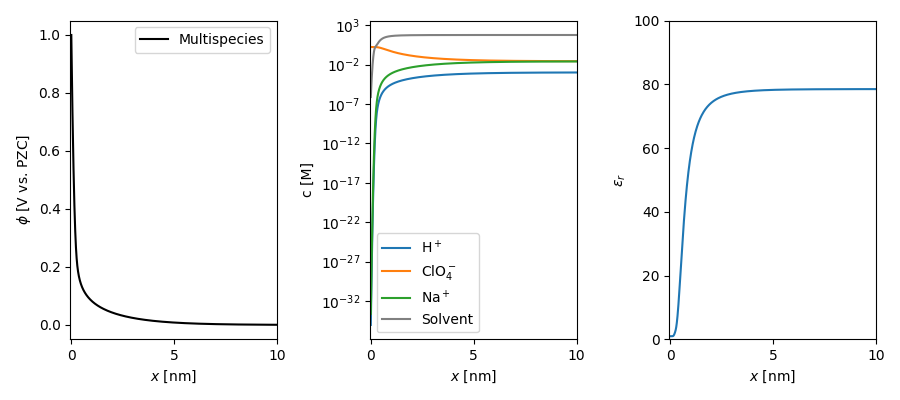

In [9]:
H = models.Species(1e-3, 15e-10, +1, r'H$^+$')
ClO4 = models.Species(1e-3 + 25e-3, 10e-10, -1, r'ClO$_4^-$')
Na = models.Species(25e-3, 8e-10, +1, r'Na$^+$')
species_list = [H, ClO4, Na]
water = models.Solvent(2.75e-10, r'H$_2$O')

multi = models.Multispecies(species_list, water, eps_r_opt=1)
multi_sol = multi.solve(x, bc)

fig, ax = plotting.plot_solution(multi_sol, xmin, xmax, logscale=True)

Should equal Huang if there are two species

Solved in 3 iterations, number of nodes 5986. 
Maximum relative residual: 2.27e-05 
Maximum boundary residual: 7.70e-26
ODE problem solved and saved under ./solutions/Multispecies\sol_Multispecies_c0_0.0010M__xmax_100nm__bc_Dirichlet_1.000V.pkl.


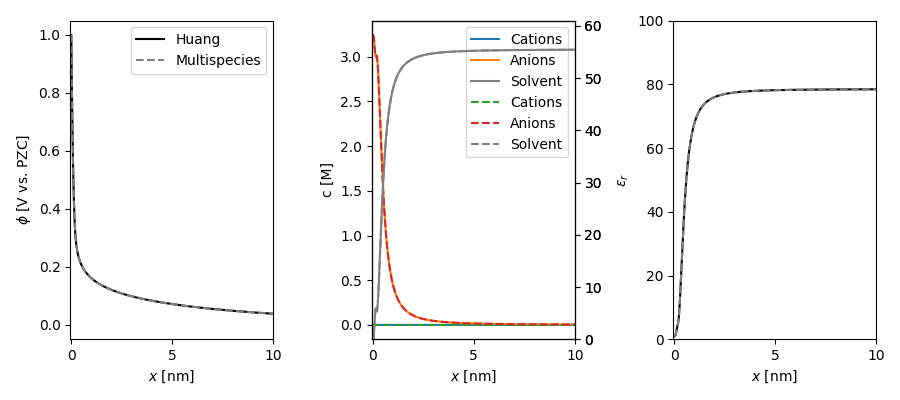

In [10]:
cations  = models.Species(ion_concentration_molar, ion_diameter_m, +1, 'Cations')
anions = models.Species(ion_concentration_molar, ion_diameter_m, -1, 'Anions')
water = models.Solvent(solvent_diameter_m, 'Water')
multi = models.Multispecies([cations, anions], water, eps_r_opt=1)
multi_sol = multi.solve(x, bc)

fig, ax = plotting.plot_sol_comparison(huang_sol, multi_sol, xmin, xmax, logscale=False)

To do:

* Check if multispecies and Huang match if 2 species   DONE
* Improve multispecies solution storage and plotting
* Implement differential capacitance
* Implement insulator boundary condition